<a href="https://colab.research.google.com/github/Bhumeshwari-09/machine-failure-prediction-dashboard/blob/main/machine_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ai4i2020.csv")
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [ ]:
df.tail(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9990,9991,L57170,L,298.8,308.5,1527,36.2,3,0,0,0,0,0,0
9991,9992,M24851,M,298.9,308.4,1827,26.1,5,0,0,0,0,0,0
9992,9993,L57172,L,298.8,308.4,1484,39.2,8,0,0,0,0,0,0
9993,9994,L57173,L,298.8,308.4,1401,47.3,10,0,0,0,0,0,0
9994,9995,L57174,L,298.8,308.3,1634,27.9,12,0,0,0,0,0,0
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [ ]:
#Type-wise failure rate
df.groupby('Type')['Machine failure'].mean()

#in %
#df.groupby('Type')['Machine failure'].mean().round(2)



,Machine failure
Type,
H,0.020937
L,0.039167
M,0.027694


In [ ]:
#Temperature impact
df[['Air temperature [K]', 'Process temperature [K]', 'Machine failure']].corr()


,Air temperature [K],Process temperature [K],Machine failure
Air temperature [K],1.000000,0.876107,0.082556
Process temperature [K],0.876107,1.000000,0.035946
Machine failure,0.082556,0.035946,1.000000


<Axes: xlabel='Machine failure', ylabel='Rotational speed [rpm]'>

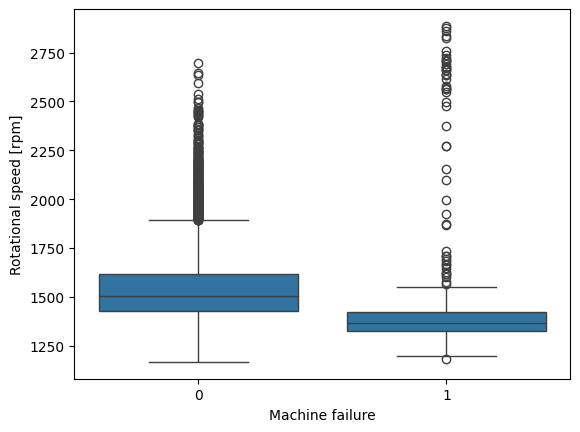

In [ ]:
#Rotational speed vs failure
sns.boxplot(x='Machine failure', y='Rotational speed [rpm]', data=df)


<Axes: xlabel='Torque [Nm]', ylabel='Tool wear [min]'>

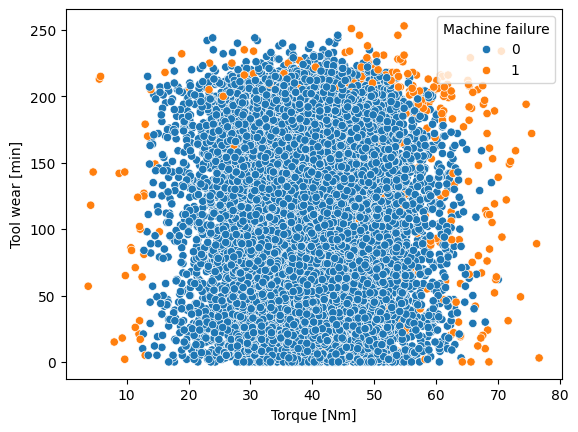

In [ ]:
#Torque and Tool wear relation
sns.scatterplot(x='Torque [Nm]', y='Tool wear [min]', hue='Machine failure', data=df)


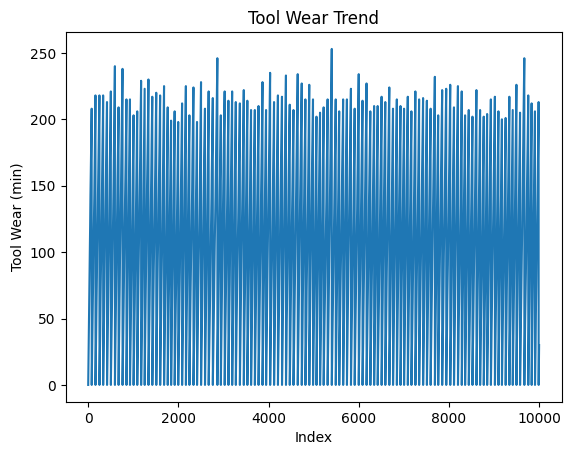

In [ ]:
plt.plot(df['Tool wear [min]'])
plt.title("Tool Wear Trend")
plt.xlabel("Index")
plt.ylabel("Tool Wear (min)")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


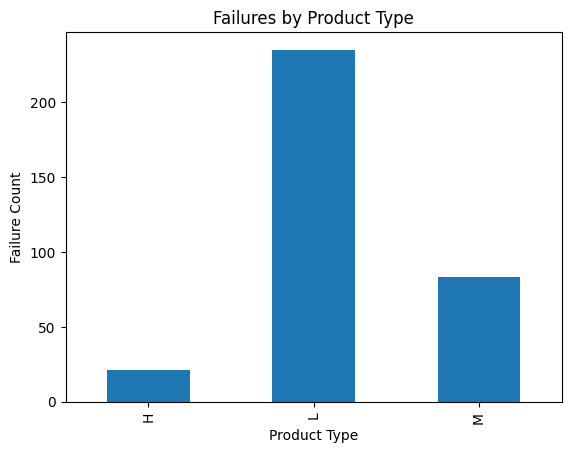

In [ ]:
df.groupby('Type')['Machine failure'].sum().plot(kind='bar')
plt.title("Failures by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Failure Count")
plt.show()


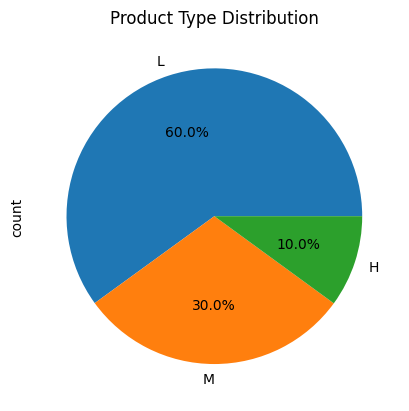

In [ ]:
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Product Type Distribution")
plt.show()


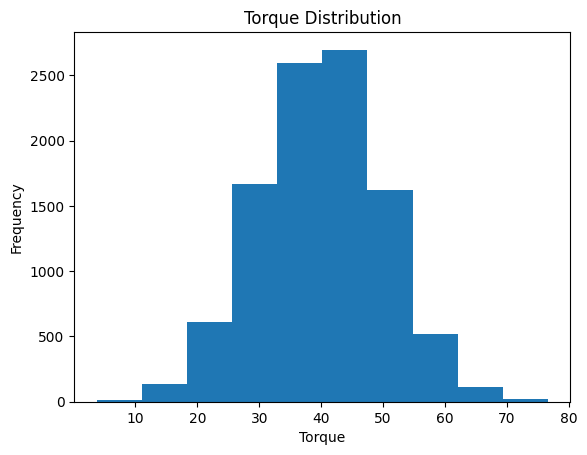

In [ ]:
plt.hist(df['Torque [Nm]'])
plt.title("Torque Distribution")
plt.xlabel("Torque")
plt.ylabel("Frequency")
plt.show()


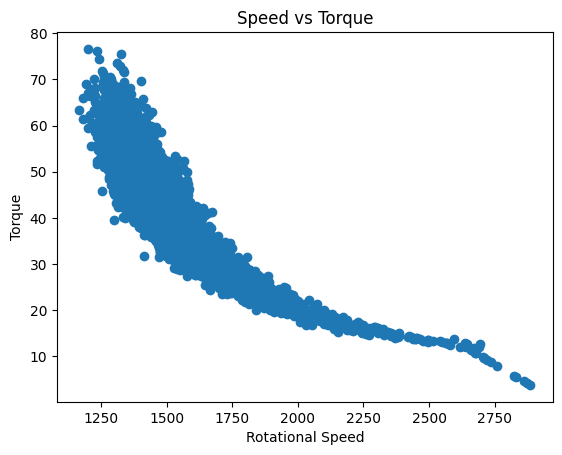

In [ ]:
plt.scatter(df['Rotational speed [rpm]'], df['Torque [Nm]'])
plt.title("Speed vs Torque")
plt.xlabel("Rotational Speed")
plt.ylabel("Torque")
plt.show()


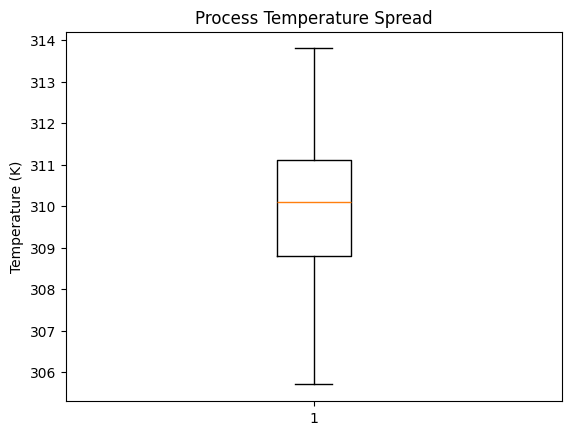

In [ ]:
plt.boxplot(df['Process temperature [K]'])
plt.title("Process Temperature Spread")
plt.ylabel("Temperature (K)")
plt.show()


In [ ]:
# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [ ]:
# Models (Classification)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [ ]:
# Metrics
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# ENCODING categorical column
label_encoder = LabelEncoder()
df["Type"] = label_encoder.fit_transform(df["Type"])  # Convert H/M/L → 0/1/2

X = df[["Type", "Air temperature [K]", "Process temperature [K]",
        "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]]

y = df["Machine failure"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Create encoder
# label_encoder = LabelEncoder()

# # Encode categorical column
# df["Type"] = label_encoder.fit_transform(df["Type"])


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict
    # Print Evaluation Metrics
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"{name} Precision: {precision_score(y_test, y_pred, average='macro'):.2f}")
    print(f"{name} Recall: {recall_score(y_test, y_pred, average='macro'):.2f}")
    print(f"{name} F1-score: {f1_score(y_test, y_pred, average='macro'):.2f}")
    print("-" * 50)

Logistic Regression Accuracy: 0.97
Logistic Regression Precision: 0.80
Logistic Regression Recall: 0.63
Logistic Regression F1-score: 0.68
--------------------------------------------------
Decision Tree Accuracy: 0.98
Decision Tree Precision: 0.82
Decision Tree Recall: 0.85
Decision Tree F1-score: 0.84
--------------------------------------------------
Random Forest Accuracy: 0.99
Random Forest Precision: 0.93
Random Forest Recall: 0.81
Random Forest F1-score: 0.86
--------------------------------------------------
SVM Accuracy: 0.97
SVM Precision: 0.98
SVM Recall: 0.51
SVM F1-score: 0.51
--------------------------------------------------
KNN Accuracy: 0.97
KNN Precision: 0.77
KNN Recall: 0.56
KNN F1-score: 0.60
--------------------------------------------------
Naive Bayes Accuracy: 0.96
Naive Bayes Precision: 0.67
Naive Bayes Recall: 0.60
Naive Bayes F1-score: 0.63
--------------------------------------------------


In [ ]:
# Create encoder
label_encoder = LabelEncoder()

# Encode categorical column
df["Type"] = label_encoder.fit_transform(df["Type"])


Encoding mapping:
{'H': np.int64(0), 'L': np.int64(1), 'M': np.int64(2)}

 Model training completed!

📊 Model Evaluation Metrics:
Accuracy: 0.973

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.64      0.26      0.37        61

    accuracy                           0.97      2000
   macro avg       0.81      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000



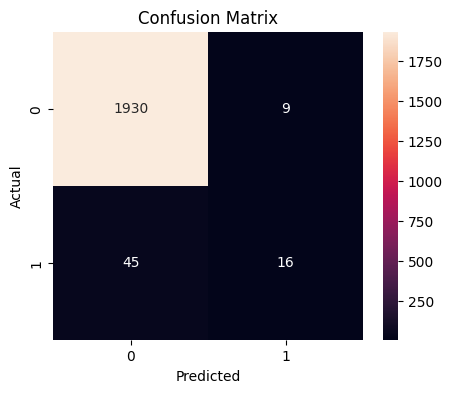

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Convert numeric Type column to L / M / H

mapping = {0: "L", 1: "M", 2: "H"}
df["Type"] = df["Type"].map(mapping)

#Label Encoding (L/M/H -> 0/1/2)
label_encoder = LabelEncoder()
df["Type_encoded"] = label_encoder.fit_transform(df["Type"])

print("\nEncoding mapping:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Feature selection
features = ["Type_encoded", "Air temperature [K]", "Process temperature [K]",
            "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]

X = df[features]
y = df["Machine failure"]


# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#  Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

print("\n Model training completed!")

# ✅ Evaluation Metrics
# ---------------------------
y_pred = model.predict(X_test)

print("\n📊 Model Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# ---------------------------
# ✅ Plot Confusion Matrix
# ---------------------------
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# User Input Function (No Error Now)
def get_user_input():
    try:
        type_input = input("\nEnter Machine Type (L / M / H): ").upper().strip()

        if type_input not in ["L", "M", "H"]:
            print("Invalid input! Allowed values are only: L, M, or H")
            return None

        type_encoded = label_encoder.transform([type_input])[0]

        air_temp = float(input("Enter Air temperature [K]: "))
        process_temp = float(input("Enter Process temperature [K]: "))
        speed = float(input("Enter Rotational speed [rpm]: "))
        torque = float(input("Enter Torque [Nm]: "))
        tool_wear = float(input("Enter Tool wear [min]: "))

        return [[type_encoded, air_temp, process_temp, speed, torque, tool_wear]]

    except Exception as e:
        print("Invalid Input:", e)
        return None

# Prediction

new_data = get_user_input()

if new_data:
    new_data_scaled = scaler.transform(new_data)
    predicted = model.predict(new_data_scaled)

    if predicted[0] == 1:
        print("\nMachine Failure Expected! Take Action.")
    else:
        print("\nMachine is Safe. No failure expected.")


In [ ]:
# Install packages
!pip install streamlit pyngrok

In [ ]:
%%writefile app.py
import streamlit as st
st.title("Hello Streamlit in Colab!")
st.write("This works using ngrok.")
# Run streamlit with ngrok
from pyngrok import ngrok
import os

# Kill any previous Streamlit processes (optional, avoids conflict)
!kill $(ps aux | grep streamlit | awk '{print $2}')  # Linux command in Colab

# Run Streamlit in background
get_ipython().system_raw('streamlit run app.py --server.port 8501 &')

# Open ngrok tunnel
public_url = ngrok.connect(port=8501)
public_url
!streamlit run app.py &

# Get the public URL
url = ngrok.connect(port='8501')
print(url)

import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# ✅ Load Dataset
# ---------------------------
st.title("🚀 Machine Failure Prediction App")
st.write("Predict if a machine is likely to fail based on process parameters.")

# Upload CSV
uploaded_file = st.file_uploader("/content/drive/MyDrive/ai4i2020.csv", type=["csv"])
if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.success("Dataset loaded successfully!")
    st.dataframe(df.head())

    # ---------------------------
    # Encode Type column
    # ---------------------------
    type_map = {"L":0, "M":1, "H":2}
    df["Type_encoded"] = df["Type"].map(type_map)

    st.write("Encoding mapping used:")
    st.write(type_map)

    # Features & target
    features = ["Type_encoded", "Air temperature [K]", "Process temperature [K]",
                "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]
    X = df[features]
    y = df["Machine failure"]

    # Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-Test Split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # Model Training
    model = LogisticRegression()
    model.fit(X_train, y_train)
    st.success("✅ Model training completed!")

    # Evaluation
    y_pred = model.predict(X_test)
    st.write("**Accuracy:**", round(accuracy_score(y_test, y_pred),3))
    st.text(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    st.write("**Confusion Matrix:**")
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", ax=ax)
    st.pyplot(fig)

    # ---------------------------
    # User Input
    # ---------------------------
    st.subheader("Enter Machine Parameters for Prediction:")

    machine_type = st.selectbox("Machine Type (L / M / H):", ["L", "M", "H"])
    air_temp = st.number_input("Air Temperature [K]:", value=300.0)
    process_temp = st.number_input("Process Temperature [K]:", value=310.0)
    speed = st.number_input("Rotational Speed [rpm]:", value=1400)
    torque = st.number_input("Torque [Nm]:", value=40)
    tool_wear = st.number_input("Tool Wear [min]:", value=200)

    if st.button("Predict"):
        # Encode Type
        type_encoded = type_map[machine_type]

        # Prepare data
        user_data = [[type_encoded, air_temp, process_temp, speed, torque, tool_wear]]
        user_data_scaled = scaler.transform(user_data)

        # Predict
        prediction = model.predict(user_data_scaled)[0]

        if prediction == 1:
            st.error("🚨 Machine Failure Expected! Take Action.")
        else:
            st.success("✅ Machine is Safe. No failure expected.")


In [ ]:
# Install pyngrok if not already installed
!pip install streamlit pyngrok > /dev/null

# Import ngrok
from pyngrok import ngrok

# Run Streamlit app in background
!streamlit run app.py &

# Open ngrok tunnel for port 8501
public_url = ngrok.connect(port='36E7FzjTOWeAk0ThtFb5Cd05NP6_62BhT3E9e4ULjNqihNw8o')
public_url
